# Trabajo Práctico 2 - Matrices Insumo-Producto

In [127]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
import numpy as np
import scipy.linalg as lng
import matplotlib.pyplot as plt
from funciones import *

## Consigna 1

Sean $A$ una matriz cuadrada e $I$ la matriz identidad tales que 
$$
(I-A)^{-1} = I + A + A² + A³ + ... + A^n + ...
$$
$$
(I-A)^{-1}=I + \sum_{i=1}^{\infty} A^{i}
$$
Queremos probar que entonces
$$
\lim_{n \to \infty} A^{n+1} = 0
$$


### Demostración

Expresando la serie como límite, obtenemos que
$$
(I-A)^{-1}=I + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i}
$$
$$
\implies (I-A)^{-1}(I-A)=(I + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i})(I-A) = I
$$
$$
\implies I - A + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i}(I-A) = I
$$
$$
\implies I - A + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i} - A^{i+1} = I
$$
$$
\implies \lim_{n \to \infty} A - A^{2} + A^{2} - A^{3} + ... + A^{n} -A^{n+1} = A
$$
$$
\implies \lim_{n \to \infty} A - A^{n+1} = A
$$
$$
\implies A - \lim_{n \to \infty} A^{n+1} = A
$$
$$
\implies \lim_{n \to \infty} A^{n+1} = 0
$$

## Consigna 2

Usamos un for para obtener las potencias de las matrices y vamos guardando las normas usando scipy.linalg.norm. 
Experimentalmente notamos que las normas de las potencias de la matriz $A_1$ tienden a infinito, mientras que las de la matriz $A_2$ tienden a 0. 

In [89]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

N = 250

a1 = np.zeros(N)
a2 = np.zeros(N)
for n in range(N):
    if not (np.any(np.isinf(A1)) or np.any(np.isinf(A2))):    
        a1[n] = lng.norm(A1,2)
        a2[n] = lng.norm(A2,2)
        A1 = A1@A1
        A2 = A2@A2
    else :
        print(f"La norma de la matriz comienza a diverger en la iteración número {n}")
        break


La norma de la matriz comienza a diverger en la iteración número 66


C:\Users\santi\AppData\Local\Temp\ipykernel_1368\232089057.py:25: RuntimeWarning: overflow encountered in matmul
  A1 = A1@A1


A continuación, graficamos los vectores $a_1$ y $a_2$ definidos de la siguiente manera: $a_1(n)= ||A_1^n||_2$, $a_2(n)= ||A_2^n||_2$.
Dado que a partir de $n=65$ la norma de la matriz $A_1$ diverge (da inf), observemos solo las primeras 65 coordenadas de a1. 

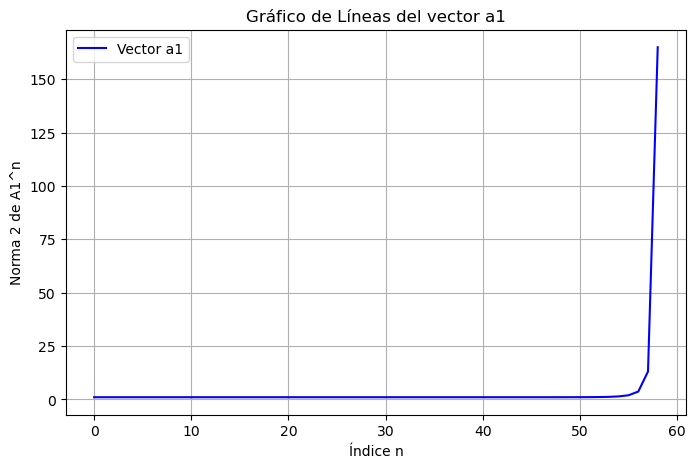

In [91]:
plt.figure(figsize=(8, 5))
# Grafico del vector a1
plt.plot(a1[:59], label='Vector a1', color='blue', linestyle='-')  # Línea para a1

plt.title('Gráfico de Líneas del vector a1')
plt.xlabel('Índice n')
plt.ylabel('Norma 2 de A1^n')

plt.legend()
plt.grid(True)
plt.show()

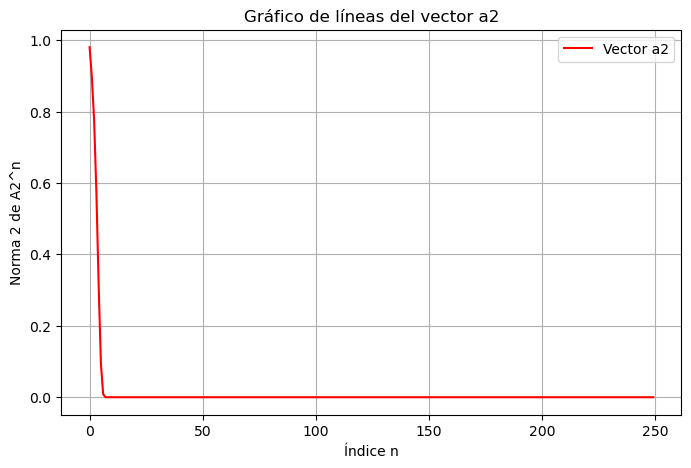

In [93]:
plt.figure(figsize=(8, 5))

plt.plot(a2, label='Vector a2', color='red', linestyle='-')   # Línea para a2
plt.title('Gráfico de líneas del vector a2')
plt.xlabel('Índice n')
plt.ylabel('Norma 2 de A2^n')

plt.legend()
plt.grid(True)
plt.show()

Del primer gráfico se observa que la matriz $A_1$ tiene la misma norma en aproximadamente sus primeras 55 potencias, luego $||A_1^n||_2$ comienza a crecer exponencialmente y diverger (Todas las entradas de la potencia tienden a infinito). Por otro lado, en el segundo gráfico se ve que la norma de la matriz $||A_2^n||_2$ cae rápidamente desde el inicio y parece converger a 0 (Todas las entradas de la potencia tienden a 0) a partir de la potencia número 10 aproximadamente.

## Consigna 3

In [95]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])
promedio_A1, desviacion_A1 = monteCarlo(A1, 250)
promedio_A2, desviacion_A2 = monteCarlo(A2, 250)

print(f"A1 - Promedio: {promedio_A1}, Desviación Estándar: {desviacion_A1}")
print(f"A2 - Promedio: {promedio_A2}, Desviación Estándar: {desviacion_A2}")

A1 - Promedio: 1.0, Desviación Estándar: 8.278423227950804e-17
A2 - Promedio: 0.9276514472123604, Desviación Estándar: 7.595094054341032e-17


## Consigna 4

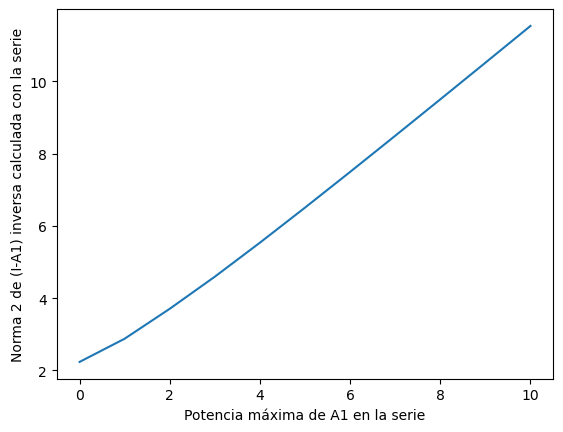

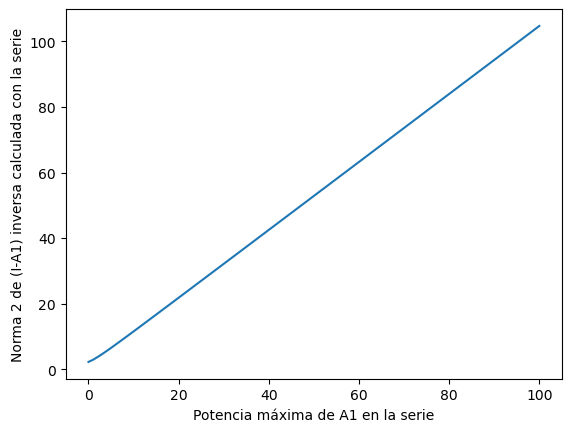

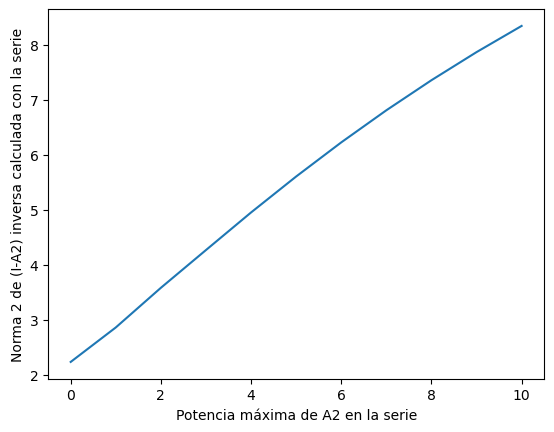

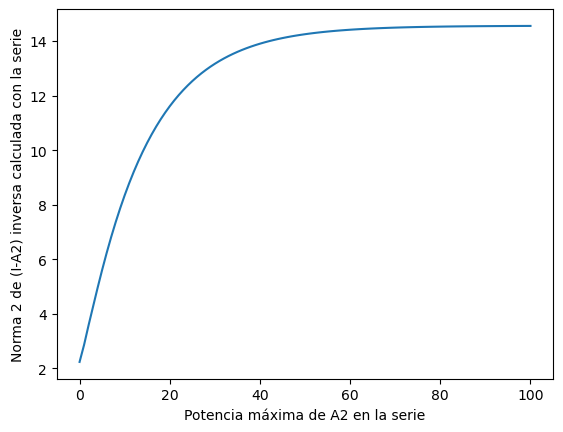

In [101]:
# gráficos
# n = 10 y A1
X , Y = normas_de_series_de_potencias(A1,10)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A1 en la serie")
plt.ylabel("Norma 2 de (I-A1) inversa calculada con la serie")
plt.show()


# n = 100 y A1
X , Y = normas_de_series_de_potencias(A1,100)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A1 en la serie")
plt.ylabel("Norma 2 de (I-A1) inversa calculada con la serie")
plt.show()
    

# n = 10 y A2
X , Y = normas_de_series_de_potencias(A2,10)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A2 en la serie")
plt.ylabel("Norma 2 de (I-A2) inversa calculada con la serie")
plt.show()


# n = 100 y A2
X , Y = normas_de_series_de_potencias(A2,100)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A2 en la serie")
plt.ylabel("Norma 2 de (I-A2) inversa calculada con la serie")
plt.show()


b) De los grficos del subpunto anterior se puede observar como al parecer la serie diverge para A1, mientras que converge para A2 (a una matriz de norma 14,5 aprox). Sabemos además que esto efectivamente va a ser asi por la propiedad dada en el subpunto c) , ya que $\rho(A1) = 1$ y $\rho(A2) ≈ 0.93 < 1$ (valores calculados en el punto 3 al calcular el autovalor de módulo máximo)

c) La serie infinita $I + A + A^2 + A^3 + ... + A^n + ...$ converge a $(I-A)^{-1}$ si y solo si el módulo del autovalor de módulo máximo de A $(\rho (A))$ es menor estricto que 1. 
Demostración: <br>
Por la consigna 1, $(I-A)^{-1} = I + A + A^{2} + ... + A^{n} + ...  \iff \lim_{n \to \infty} A^{n+1} = 0 $<br>
y
$$
\lim_{n \to \infty} A^{n+1} = 0 \iff \lim_{n \to \infty} A^{n} =  0 \iff \lim_{n \to \infty} ||A^{n}|| = 0 $$
Por la proposición 5.15 del apunte, 
$$\lim_{n \to \infty} ||A^{n}|| = 0 \iff  \rho(A) < 1$$
De esta cadena de equivalencias se conluye que $(I-A)^{-1} = I + A + A^2 + A^3 + ... + A^n + ... \iff \rho(A) < 1$
$ \Box$

d)


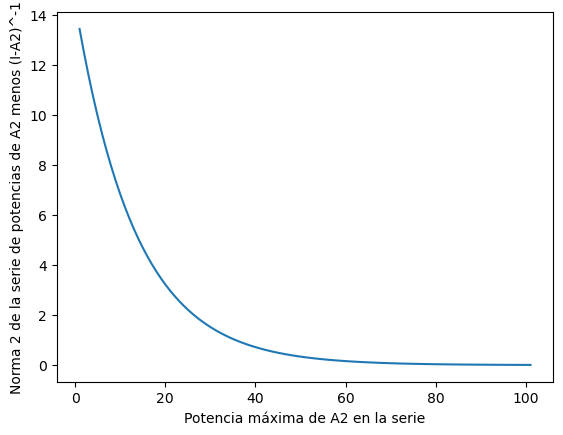

In [123]:
# Graficamos y calculamos el vector de error solo para A2 porque es la única matriz para la que converge la serie


# calculamos el vector de error
I = np.eye(A2.shape[0])
L,U,P = calcularLU(I-A2)
inversa = inversaLU(L,U,P)
aproximacion_inversa = I
e_n = []
indices = []
for i in range(1,100 + 2):
    e_n.append(np.linalg.norm(aproximacion_inversa - inversa,2))
    indices.append(i)
    aproximacion_inversa += np.linalg.matrix_power(A2,i)

# graficamos el vector
plt.plot(indices,e_n)
plt.xlabel("Potencia máxima de A2 en la serie")
plt.ylabel("Norma 2 de la serie de potencias de A2 menos (I-A2)^-1")
plt.show()

Como era de esperarse, se puede ver en el gráfico que el error tiende a 0 a medida que aumenta la maxima potencia de la serie, ya que esta converge a $(I-A_{2})^{-1}$. 